In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


In [30]:

geo_file = 'D:\CSSP\out_data/SJY/finalsurfacedata__dynlai.nc'
mask_file  = 'D:\CSSP\out_data/SJY/finalsurfacedata__dynlai.nc'
geo = xr.open_dataset(geo_file)
lats = geo['XLAT']
lons = geo['XLON']
lats.shape

(139, 289)

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd

In [4]:
def plot_spatial_distribution1(nc_file, geo_file, varname, mask=None, mask_value=np.nan):
    """
    根据NetCDF文件数据绘制气象要素的空间分布图，并根据条件添加掩膜
    
    参数:
    nc_file: NetCDF文件路径
    geo_file: 包含地理信息的NetCDF文件路径
    varname: 要绘制的变量名
    mask: 掩膜条件，可以是布尔值的xarray DataArray或numpy数组
    mask_value: 掩膜的替代值，默认为 np.nan
    """
    import matplotlib.pyplot as plt
    from matplotlib import font_manager



    # 读取NetCDF文件
    ds = xr.open_dataset(nc_file)
    geo = xr.open_dataset(geo_file)
    
    # 提取变量数据
    data = ds[varname]
    print(data.shape)
    lats = geo['XLAT']
    lons = geo['XLON']
    lat = np.array(lats[:, 0])
    lon = np.array(lons[0, :])
    lat = np.arange(30.635, 37.585, -(30.635 - 37.585) / 654)
    lon = np.arange(88.665, 103.115, -(88.665 - 103.115) / 1372)   
    #data = data[::,:]
    # 检查是否提供了mask
    if mask is not None:
        # 如果传入的mask为True的地方，将数据替换为mask_value（默认np.nan）
        data = data.where(mask, mask_value)
    
    # 设置绘图
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    cmap = plt.get_cmap('coolwarm')  # 或者 'viridis'、'plasma' 等
    vmin = data.min().values
    print(data.min().values)
    vmax = data.max().values
    print(data.max().values ) # 获取最大值
  
    print(f"Max value after masking: {vmax}")

    # 设置等值线的范围
    levels = np.linspace(vmin, vmax, 50)

    # 绘制等值线图
    contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
    
    # 添加颜色条
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

    # 添加地理特征
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # 添加经纬网
    ax.gridlines(draw_labels=True)
    ax.set_title(f'三江源{varname}空间分布')
    
    # 显示图像
    plt.show()

nc_file1 = 'D:\CSSP\out_data\SJY/glacier_coverage_output.nc'
#geo_file1= 'D:\CSSP\out_data/CSSPsurface_TG_Global1997_1997_glc.nc'
varname = 'glacier_coverage'

#plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)
#lon = np.empty(1440)
tiff_mask_file = 'D:/CSSP/SJY/mask_TGSJY8.tif'  # 你的 TIFF 掩膜文件路径
#plot_spatial_distribution(nc_file1,geo_file, varname,tiff_mask_file,np.nan)
# 创建经度数组

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors


def plot_spatial_distribution(nc_file, geo_file, varname, mask=None, mask_value=np.nan):
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # 读取 NetCDF 文件
    ds = xr.open_dataset(nc_file)
    geo = xr.open_dataset(geo_file)
    
    data2 = geo[varname]
    data = ds[varname]
    data = (data + data2) / 2
    print(data.shape)
    
    # 使用正确的 np.linspace 来生成经纬度
    #lats = np.linspace(30.635, 37.585, 654)
    #lons = np.linspace(88.665, 103.115, 1372)
    lats = np.linspace(32.9733, 33.2067, 29)
    lons = np.linspace(91.9374, 92.1706, 24)
    # 应用掩膜
    if mask is not None:
        mask_resized = mask.interp_like(data)  # 直接插值到 data 的坐标系统

        print(mask_resized.shape,data.shape)
        data = xr.where(mask_resized, data, mask_value)

    data_reversed = data[:, :]  # 反转纬度方向

    # 设置绘图
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    cmap = plt.get_cmap('coolwarm')  # 或者 'viridis'、'plasma' 等
    vmin = 250
    vmax = data.max().values  # 获取最大值
    print(vmax,vmin)
    print(f"Max value after masking: {vmax}")

    # 设置等值线的范围
    levels = np.linspace(vmin, vmax, 50)  

    # 绘制等值线图
    contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
    
    # 添加颜色条
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
    
    # 添加地理特征
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # 添加经纬网
    ax.gridlines(draw_labels=True)
    ax.set_title(f'三江源{varname}空间分布')

    # 显示图像
    plt.show()

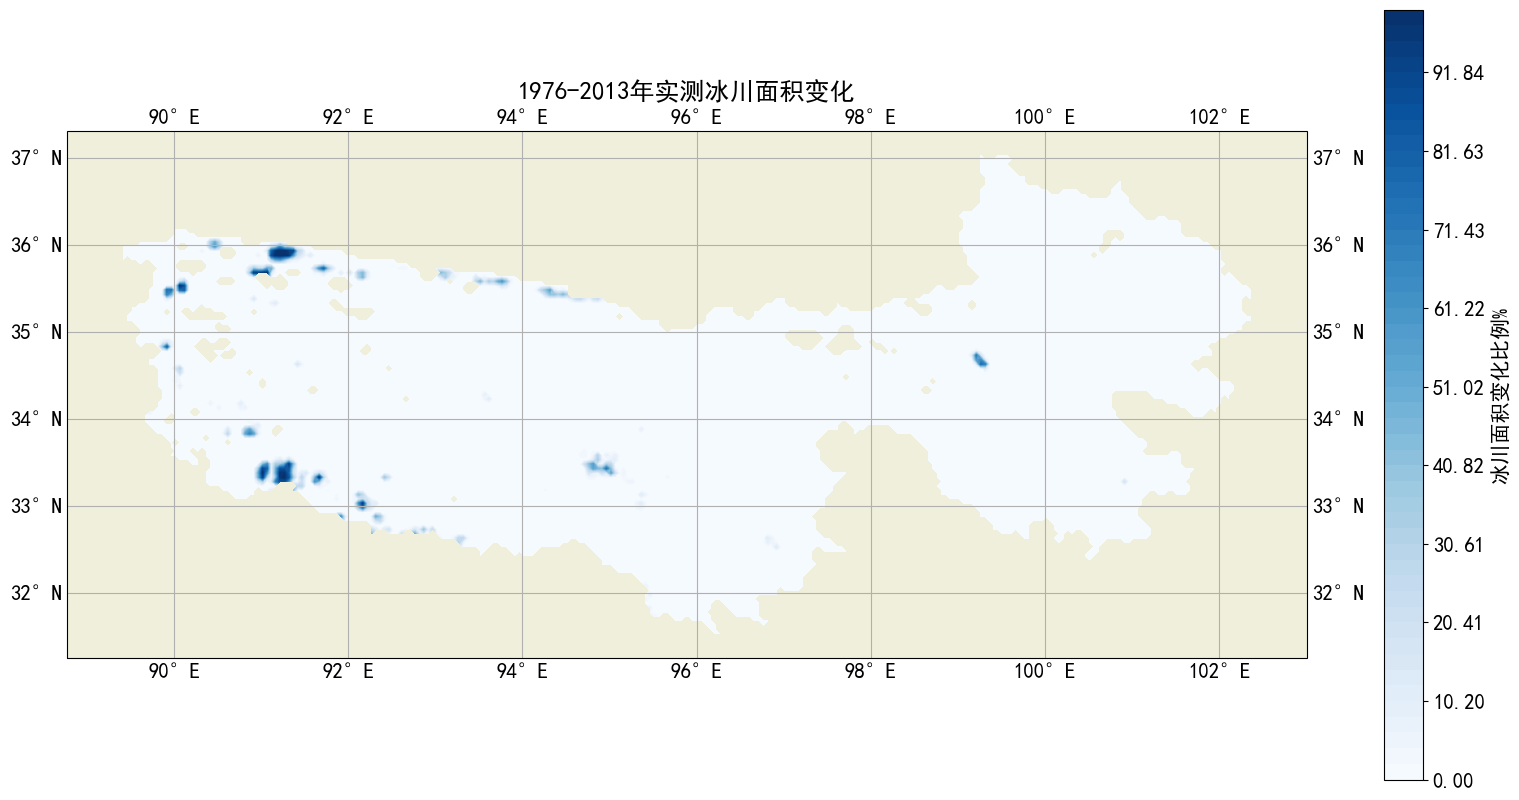

(139, 289)
100.0 0.0
Max value after masking: 100.0


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd

# 文件路径和变量名
nc_file1 = 'D:\CSSP/SJY/SJY1976glacier_coverage_output1.nc'
nc_file2 = 'D:\CSSP/SJY/SJY2013glacier_coverage_output1.nc'
#geo_file = 'D:\CSSP/SJY/geo_em.d01.nc' # 添加geo_em文件路径
#mask_file = 'D:\CSSP/SJY/SJY_mask.nc' # 添加mask文件路径
varname = 'glacier_coverage'
shp_file = "D:\CSSP\SJY\SJY_river.shp" 
sjy_shp_flile = "D:\download\下载 (26)\三江源区范围数据集（2018）\The Boundary_Drainage_Basin of Sanjiangyuan\Drainage_Basin.shp"

# 设置字体
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
geo = xr.open_dataset(geo_file)
ds = xr.open_dataset(nc_file1)
ds2 = xr.open_dataset(nc_file2)
dx = xr.open_dataset(mask_file)

lats = geo['XLAT']
lons = geo['XLON']
data2 = ds2[varname]
data = ds[varname]

# 计算冰川变化百分比
#data = (data - data2) * 100

# 读取 shapefile
shapefile = gpd.read_file(shp_file)
sjy_boundary = gpd.read_file(sjy_shp_flile)
# 读取并应用掩膜
mask = dx['mask']
mask = np.array(mask).astype(bool)
# 应用掩膜 (不需要移动 mask)
data = data.where(mask[:, :], np.nan)

# 反转纬度（如果需要）
data = data[:, :]
#data =-data2 +data
data =data * 100
# 创建绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置颜色映射和范围
cmap = plt.get_cmap('Blues')
vmin = data.min().values
vmax = data.max().values
levels = np.linspace(vmin, vmax, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# 添加颜色条

#ticks = [0, 3, 6, 9, 12, 15] #  例如，设置刻度在0, 3, 6, 9, 12, 15
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', label='冰川面积变化比例%')
#cbar.set_ticks(ticks)




# 绘制三江源边界
sjy_boundary.plot(ax=ax, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=2, zorder=3)  # zorder 控制绘制顺序

# 绘制河流shapefile (zorder 保证在边界之上，等值线图之下)
#shapefile.plot(ax=ax, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='blue', linewidth=1, zorder=2)


# ... (你的地理特征、经纬网、标题设置) ...



# ... (你的打印语句) ...


# 添加地理特征和经纬网
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.gridlines(draw_labels=True)

# 添加标题
ax.set_title(f'2000年实测冰川面积')

# 显示图像
plt.show()

print(data.shape)
print(vmax, vmin)
print(f"Max value after masking: {vmax}")


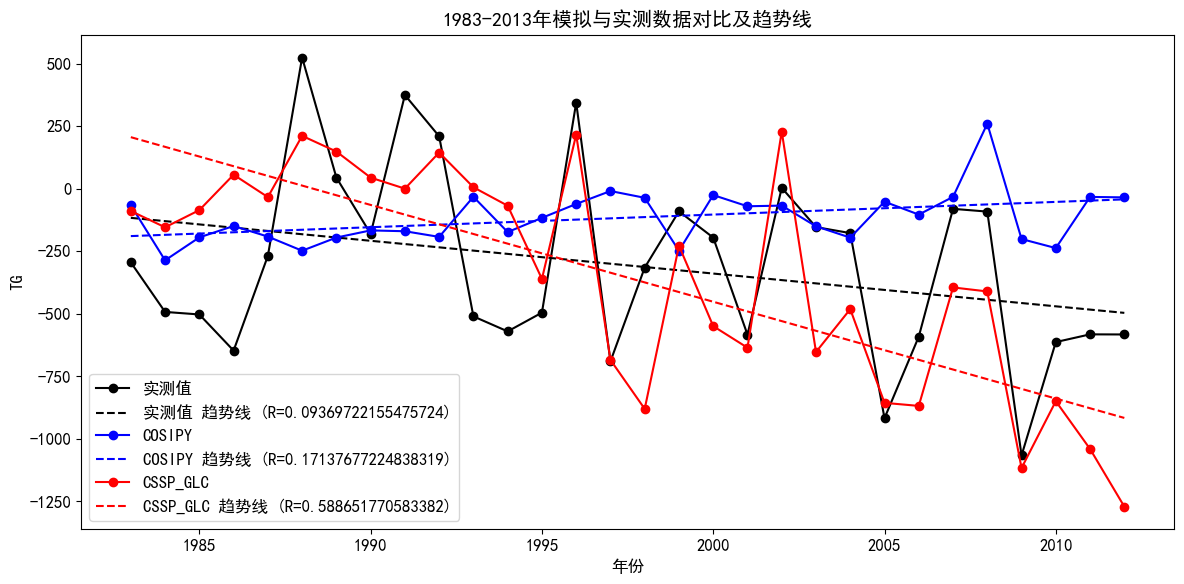

Pearson相关系数: 0.7638
RMSE: 347.36
Pearson相关系数: -0.0218
RMSE: 436.67


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

def calculate_pearson_correlation(x, y):
    """计算Pearson相关系数"""
    correlation, p_value = linregress(x, y)[:2] # 使用linregress直接计算r值
    print(f"Pearson相关系数: {correlation:.4f}")


def rmse(y_true, y_pred):
    """计算均方根误差"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_with_trendline(x, y, label, color, ax):
    """绘制数据点和线性趋势线"""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = slope * x + intercept
    ax.plot(x, y, marker='o', linestyle='-', label=label, color=color)
    ax.plot(x, trendline, linestyle='--', color=color, label=f'{label} 趋势线 (R={r_value**2})')

# 画图
# 设置画图字体的大小
plt.rcParams.update({'font.size': 12}) # 调整字体大小，使其更美观
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # SimHei 或者其他包含上标2的字体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# ... 你的绘图代码 ...

# ... 你的绘图代码 ...

fig, ax = plt.subplots(figsize=(12, 6))  # 使用subplots创建子图，更灵活

years = np.arange(1983, 2013)
# 替换为你的实际数据
y =  DKMD_data1[10:]
y_glc1 =modelDataArraysmb_cosipyDKMD[4:34]*1000
#y_glc1 =DKMD_SMB4_snow[5:35]
y_glc2 = - DKMD_SMB20[5:35]*50 +4950 #+ 5780

#y = np.random.rand(len(years)) * 100 + 200 # 替换为你的实测数据
#y_glc1 = np.random.rand(len(years)) * 80 + 150 # 替换为你的模拟数据1
#y_glc2 = np.random.rand(len(years)) * 120 + 250 # 替换为你的模拟数据2
years = years.astype(float)
y = y.astype(float)
y_glc1 = y_glc1.astype(float)
y_glc2 = y_glc2.astype(float)


plot_with_trendline(years, y, '实测值', 'k', ax)
plot_with_trendline(years, y_glc1, 'COSIPY', 'b', ax)
plot_with_trendline(years, y_glc2, 'CSSP_GLC', 'r', ax)


ax.set_xlabel('年份')
ax.set_ylabel('TG')
ax.set_title("1983-2013年模拟与实测数据对比及趋势线")
ax.legend()

plt.tight_layout() # 自动调整子图间距，防止标签重叠
plt.show()


calculate_pearson_correlation(y, y_glc2)
print(f"RMSE: {rmse(y, y_glc2):.2f}")

calculate_pearson_correlation(y, y_glc1)
print(f"RMSE: {rmse(y, y_glc1):.2f}")

(139, 289)
0.0
0.9865010956902849
Max value after masking: 0.9865010956902849


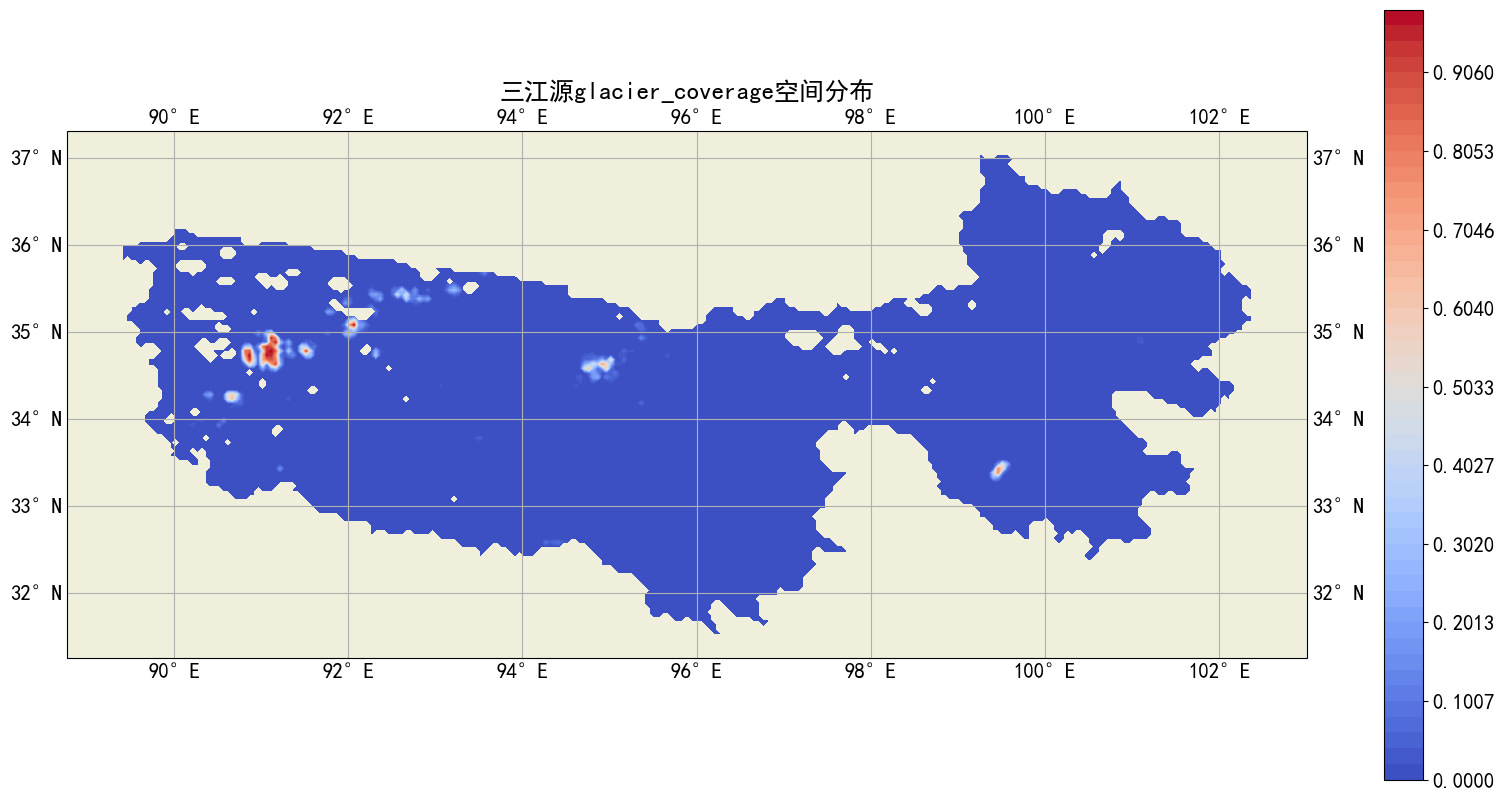

ValueError: could not broadcast input array from shape (720,) into shape (0,)

In [ ]:

nc_file1 = 'D:\CSSP\out_data\SJY/glacier_coverage_output.nc'
geo_file1= 'D:\CSSP\out_data/CSSPsurface_TG_Global1997_1997_glc.nc'
varname = 'glacier_coverage'
dx = xr.open_dataset(mask_file)
mask = dx['mask']
mask = np.array(mask).astype(bool) 
plot_spatial_distribution1(nc_file1,geo_file, varname,mask,np.nan)
lon = np.empty(1440)

# 创建经度数组
lon = np.arange(180, -180,0.25)
lon[:720] = np.arange(0, 180, 0.25)
lon[720:] = np.arange(-180, 0, 0.25)

In [ ]:
nc_file = geo_file = 'D:\CSSP\SJY/1976SJYglacier_coverage_output1.nc'
geo_file1= 'D:\CSSP\out_data/SJY/2013glacier_coverage_output.nc'
varname = 'glacier_coverage'
dx = xr.open_dataset(mask_file)
mask = dx['mask']
mask = np.array(mask).astype(bool) 
print(mask.shape)
"""
根据NetCDF文件数据绘制气象要素的空间分布图，并根据条件添加掩膜

参数:
nc_file: NetCDF文件路径
geo_file: 包含地理信息的NetCDF文件路径
varname: 要绘制的变量名
mask: 掩膜条件，可以是布尔值的xarray DataArray或numpy数组
mask_value: 掩膜的替代值，默认为 np.nan
"""
# 读取NetCDF文件
ds = xr.open_dataset(nc_file)
geo = xr.open_dataset(geo_file)

# 提取变量数据
data = ds[varname]
data = data[:,:]
data2 = geo[varname]
data2 = data2[:,:]
print(data.shape)
#lats = geo['XLAT']
#lons = geo['XLON']
lat = np.array(lats[:, 0])
lon = np.array(lons[0, :])
lat = np.arange(30.635, 37.585, -(30.635 - 37.585) / 654)
lon = np.arange(88.665, 103.115, -(88.665 - 103.115) / 1372)   
# 检查是否提供了mask
if mask is not None:
    # 如果传入的mask为True的地方，将数据替换为mask_value（默认np.nan）
    data = data.where(mask,np.nan)

# 设置绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('coolwarm')  # 或者 'viridis'、'plasma' 等
vmin = data.min().values
vmax = data.max().values  # 获取最大值

print(f"Max value after masking: {vmax}")

# 设置等值线的范围
levels = np.linspace(vmin, vmax, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# 添加经纬网
ax.gridlines(draw_labels=True)
ax.set_title(f'三江源{varname}空间分布')

# 显示图像
plt.show()





NameError: name 'xr' is not defined

(29, 29)
261.9493408203125
271.7359924316406
Max value after masking: 275


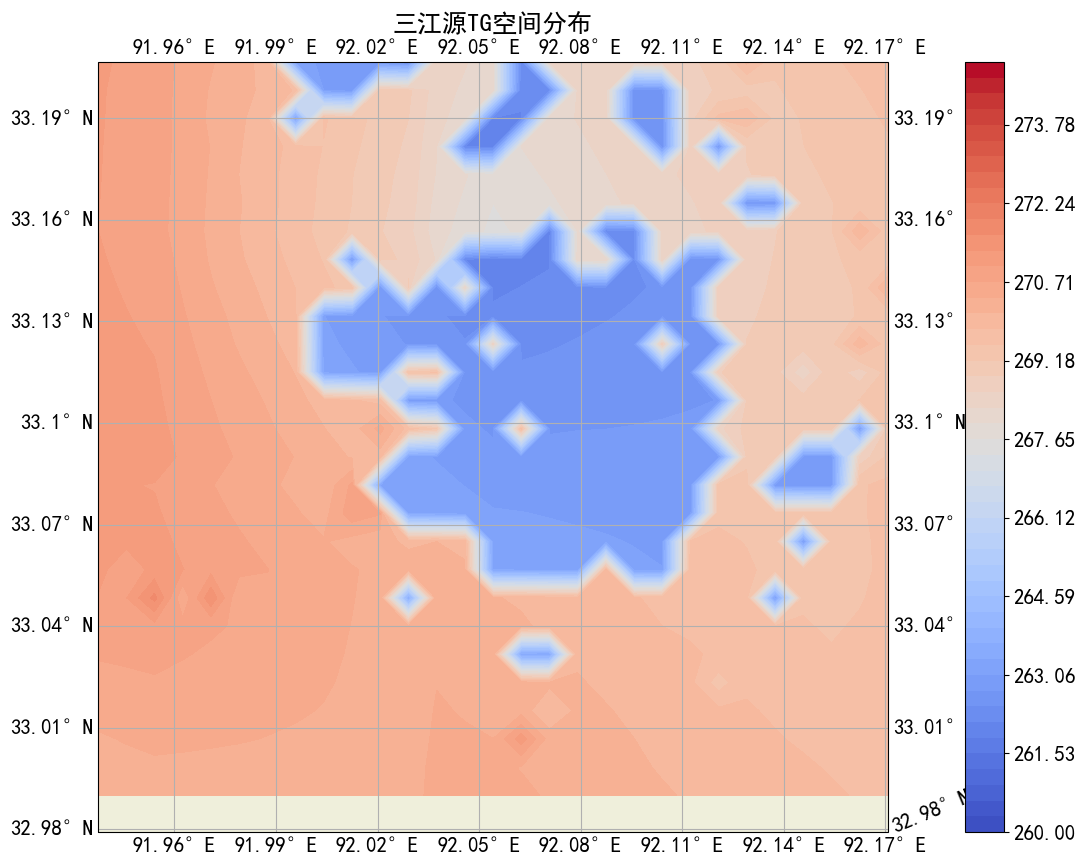

(29, 29)
263.7120056152344
273.032470703125
Max value after masking: 275


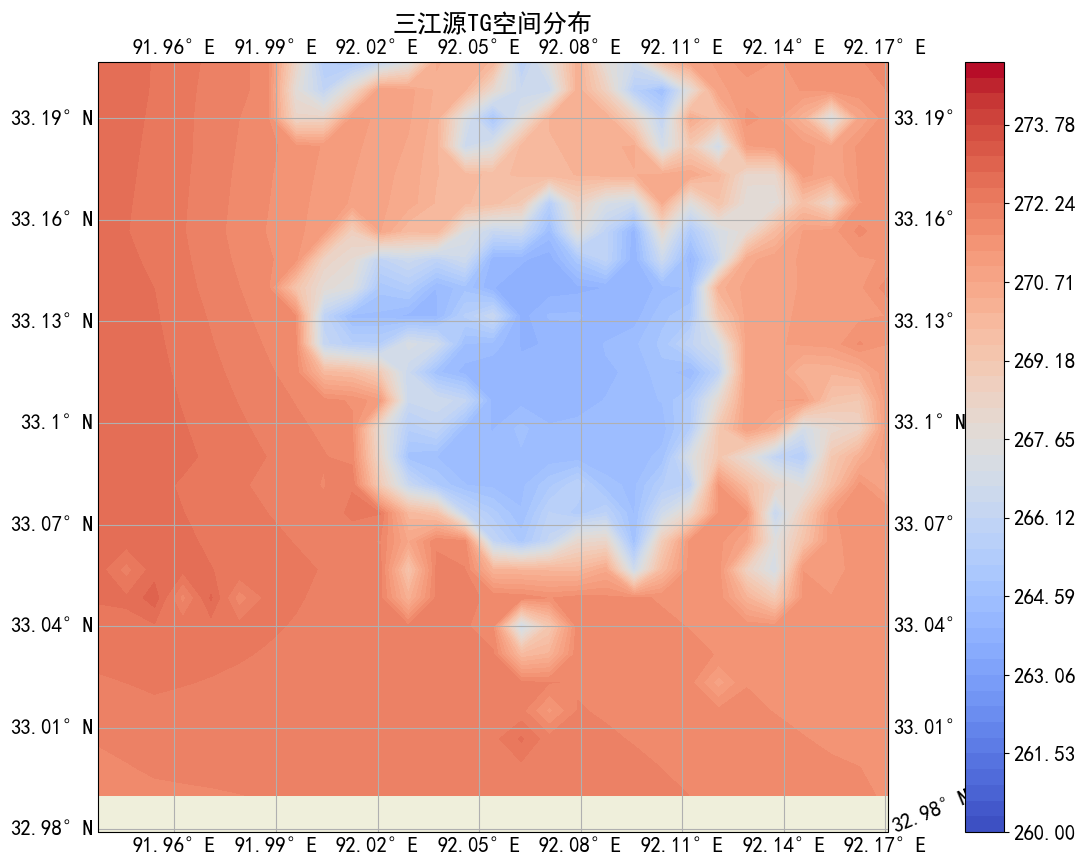

In [ ]:
geo_file = 'D:\CSSP\out_data\DKMD/finalsurfacedata__dynlai.nc'
nc_file1 = 'D:\CSSP\out_data\DKMD/CSSPsurface_TG_DKMD1979_1990_gridglc_out.nc'
nc_file2 = 'D:\CSSP\out_data\DKMD/CSSPsurface_TG_DKMD2001_2017_glc_out1.nc'
nc_file3 = 'D:\CSSP\out_data\DKMD/CSSPsurface_TG_DKMD1979_1979_glc=0_out.nc'

varname = 'TG'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 
#plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)
plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)
plot_spatial_distribution1(nc_file2,geo_file, varname,None,1)

(139, 289)
0.0
0.9968151935719504
Max value after masking: 0.9968151935719504


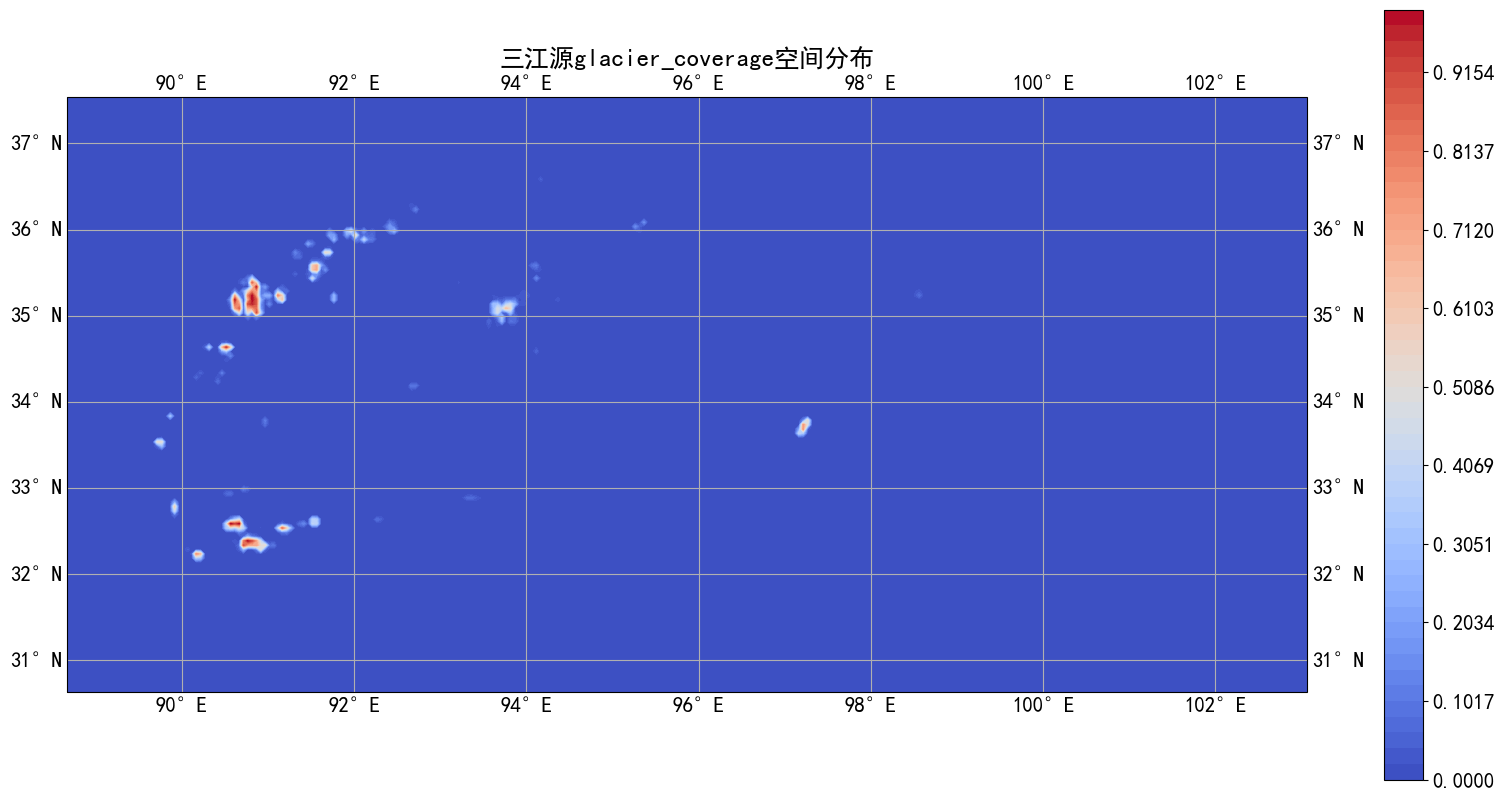

KeyError: 'glacier_coverage'

In [ ]:
nc_file1 = 'D:\CSSP\out_data/SJY/1976glacier_coverage_output.nc'
varname = 'glacier_coverage'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 
plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)
nc_file2 = 'D:\CSSP\out_data/SJY/CSSPsurface_TG_SJY2001_2017_glc=1.nc'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 
plot_spatial_distribution1(nc_file2,geo_file, varname,None,1)

(139, 289)
0.0
12977930.198392987
Max value after masking: 12977930.198392987


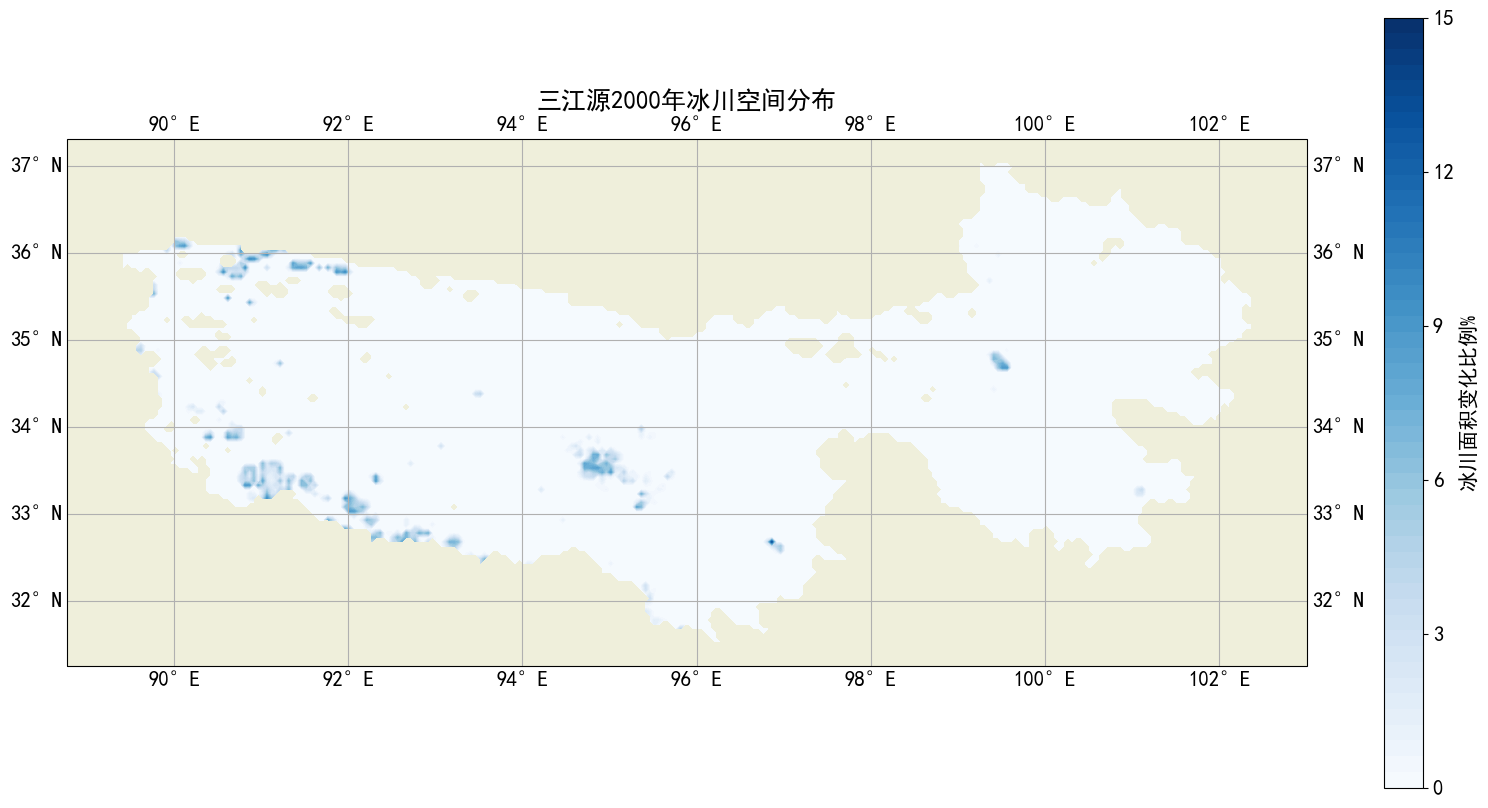

In [ ]:
nc_file1 = 'D:\CSSP\out_data/SJY/CSSPsurface_SMB_SJY1979_2013_glc.nc'
varname = 'SMB_sum'
nc_file2 = 'D:\CSSP\SJY/glacier_coverage_output.nc'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 

"""
根据NetCDF文件数据绘制气象要素的空间分布图，并根据条件添加掩膜

参数:
nc_file: NetCDF文件路径
geo_file: 包含地理信息的NetCDF文件路径
varname: 要绘制的变量名
mask: 掩膜条件，可以是布尔值的xarray DataArray或numpy数组
mask_value: 掩膜的替代值，默认为 np.nan
"""
import matplotlib.pyplot as plt
from matplotlib import font_manager



# 读取NetCDF文件
ds = xr.open_dataset(nc_file1)
ds2 = xr.open_dataset(nc_file2)
geo = xr.open_dataset(geo_file )
wight = ds2['glacier_coverage']
# 提取变量数据
data = ds[varname]
data = wight[::-1,:] *data
print(data.shape)
lats = geo['XLAT']
lons = geo['XLON']
lat = np.array(lats[:, 0])
lon = np.array(lons[0, :])
lat = np.arange(30.635, 37.585, -(30.635 - 37.585) / 654)
lon = np.arange(88.665, 103.115, -(88.665 - 103.115) / 1372)   
data = data[::,:]
# 检查是否提供了mask
if mask is not None:
    # 如果传入的mask为True的地方，将数据替换为mask_value（默认np.nan）
    data = data.where(mask, np.nan)

# 设置绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
#ticks = [0, 3, 6, 9, 12, 15] #  例如，设置刻度在0, 3, 6, 9, 12, 15
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', label='冰川面积变化比例%')
#cbar.set_ticks(ticks)

cmap = plt.get_cmap('Blues')  # 或者 'viridis'、'plasma' 等
vmin = data.min().values
print(data.min().values)
vmax =data.max().values
print(data.max().values ) # 获取最大值

print(f"Max value after masking: {vmax}")

# 设置等值线的范围
levels = np.linspace(0, 15, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats,data/1000000, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())



# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# 添加经纬网
ax.gridlines(draw_labels=True)
ax.set_title(f'三江源2000年冰川空间分布')

# 显示图像
plt.show()

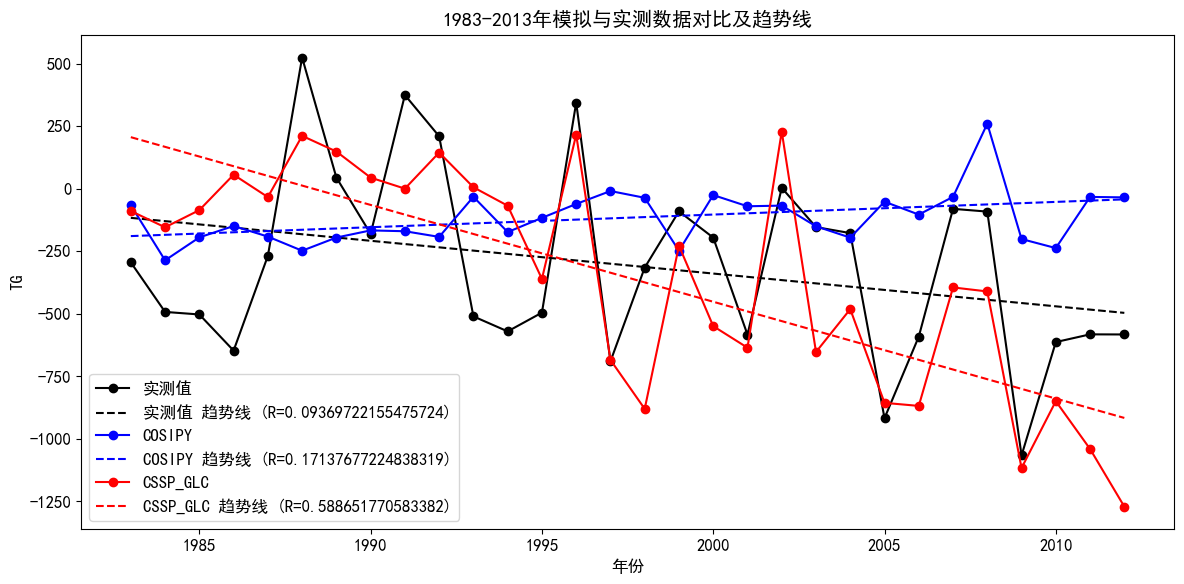

Pearson相关系数: 0.7638
RMSE: 347.36
Pearson相关系数: -0.0218
RMSE: 436.67


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

def calculate_pearson_correlation(x, y):
    """计算Pearson相关系数"""
    correlation, p_value = linregress(x, y)[:2] # 使用linregress直接计算r值
    print(f"Pearson相关系数: {correlation:.4f}")


def rmse(y_true, y_pred):
    """计算均方根误差"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_with_trendline(x, y, label, color, ax):
    """绘制数据点和线性趋势线"""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = slope * x + intercept
    ax.plot(x, y, marker='o', linestyle='-', label=label, color=color)
    ax.plot(x, trendline, linestyle='--', color=color, label=f'{label} 趋势线 (R={r_value**2})')

# 画图
# 设置画图字体的大小
plt.rcParams.update({'font.size': 12}) # 调整字体大小，使其更美观
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # SimHei 或者其他包含上标2的字体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# ... 你的绘图代码 ...

# ... 你的绘图代码 ...

fig, ax = plt.subplots(figsize=(12, 6))  # 使用subplots创建子图，更灵活

years = np.arange(1983, 2013)
# 替换为你的实际数据
y =  DKMD_data1[10:]
y_glc1 =modelDataArraysmb_cosipyGLDD[4:34]*1000
#y_glc1 =DKMD_SMB4_snow[5:35]
y_glc2 = - DKMD_SMB20[5:35]*50 +4950 #+ 5780

#y = np.random.rand(len(years)) * 100 + 200 # 替换为你的实测数据
#y_glc1 = np.random.rand(len(years)) * 80 + 150 # 替换为你的模拟数据1
#y_glc2 = np.random.rand(len(years)) * 120 + 250 # 替换为你的模拟数据2
years = years.astype(float)
y = y.astype(float)
y_glc1 = y_glc1.astype(float)
y_glc2 = y_glc2.astype(float)


plot_with_trendline(years, y, '实测值', 'k', ax)
plot_with_trendline(years, y_glc1, 'COSIPY', 'b', ax)
plot_with_trendline(years, y_glc2, 'CSSP_GLC', 'r', ax)


ax.set_xlabel('年份')
ax.set_ylabel('TG')
ax.set_title("1983-2013年模拟与实测数据对比及趋势线")
ax.legend()

plt.tight_layout() # 自动调整子图间距，防止标签重叠
plt.show()


calculate_pearson_correlation(y, y_glc2)
print(f"RMSE: {rmse(y, y_glc2):.2f}")

calculate_pearson_correlation(y, y_glc1)
print(f"RMSE: {rmse(y, y_glc1):.2f}")

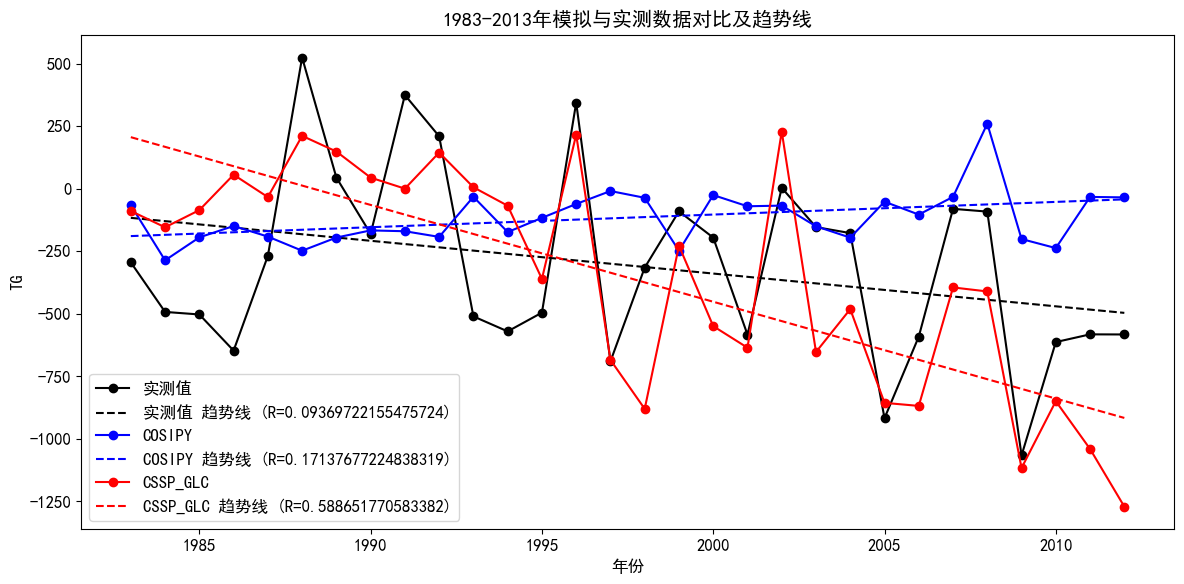

Pearson相关系数: 0.7638
RMSE: 347.36
Pearson相关系数: -0.0218
RMSE: 436.67


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

def calculate_pearson_correlation(x, y):
    """计算Pearson相关系数"""
    correlation, p_value = linregress(x, y)[:2] # 使用linregress直接计算r值
    print(f"Pearson相关系数: {correlation:.4f}")


def rmse(y_true, y_pred):
    """计算均方根误差"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_with_trendline(x, y, label, color, ax):
    """绘制数据点和线性趋势线"""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = slope * x + intercept
    ax.plot(x, y, marker='o', linestyle='-', label=label, color=color)
    ax.plot(x, trendline, linestyle='--', color=color, label=f'{label} 趋势线 (R={r_value**2})')

# 画图
# 设置画图字体的大小
plt.rcParams.update({'font.size': 12}) # 调整字体大小，使其更美观
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # SimHei 或者其他包含上标2的字体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# ... 你的绘图代码 ...

# ... 你的绘图代码 ...

fig, ax = plt.subplots(figsize=(12, 6))  # 使用subplots创建子图，更灵活

years = np.arange(1983, 2013)
# 替换为你的实际数据
y =  DKMD_data1[10:]
y_glc1 =modelDataArraysmb_cosipyGLDD[4:34]*1000
#y_glc1 =DKMD_SMB4_snow[5:35]
y_glc2 = - DKMD_SMB20[5:35]*50 +4950 #+ 5780

#y = np.random.rand(len(years)) * 100 + 200 # 替换为你的实测数据
#y_glc1 = np.random.rand(len(years)) * 80 + 150 # 替换为你的模拟数据1
#y_glc2 = np.random.rand(len(years)) * 120 + 250 # 替换为你的模拟数据2
years = years.astype(float)
y = y.astype(float)
y_glc1 = y_glc1.astype(float)
y_glc2 = y_glc2.astype(float)


plot_with_trendline(years, y, '实测值', 'k', ax)
plot_with_trendline(years, y_glc1, 'COSIPY', 'b', ax)
plot_with_trendline(years, y_glc2, 'CSSP_GLC', 'r', ax)


ax.set_xlabel('年份')
ax.set_ylabel('TG')
ax.set_title("1983-2013年模拟与实测数据对比及趋势线")
ax.legend()

plt.tight_layout() # 自动调整子图间距，防止标签重叠
plt.show()


calculate_pearson_correlation(y, y_glc2)
print(f"RMSE: {rmse(y, y_glc2):.2f}")

calculate_pearson_correlation(y, y_glc1)
print(f"RMSE: {rmse(y, y_glc1):.2f}")

(139, 289)
260.8937072753906
284.2792663574219
Max value after masking: 290


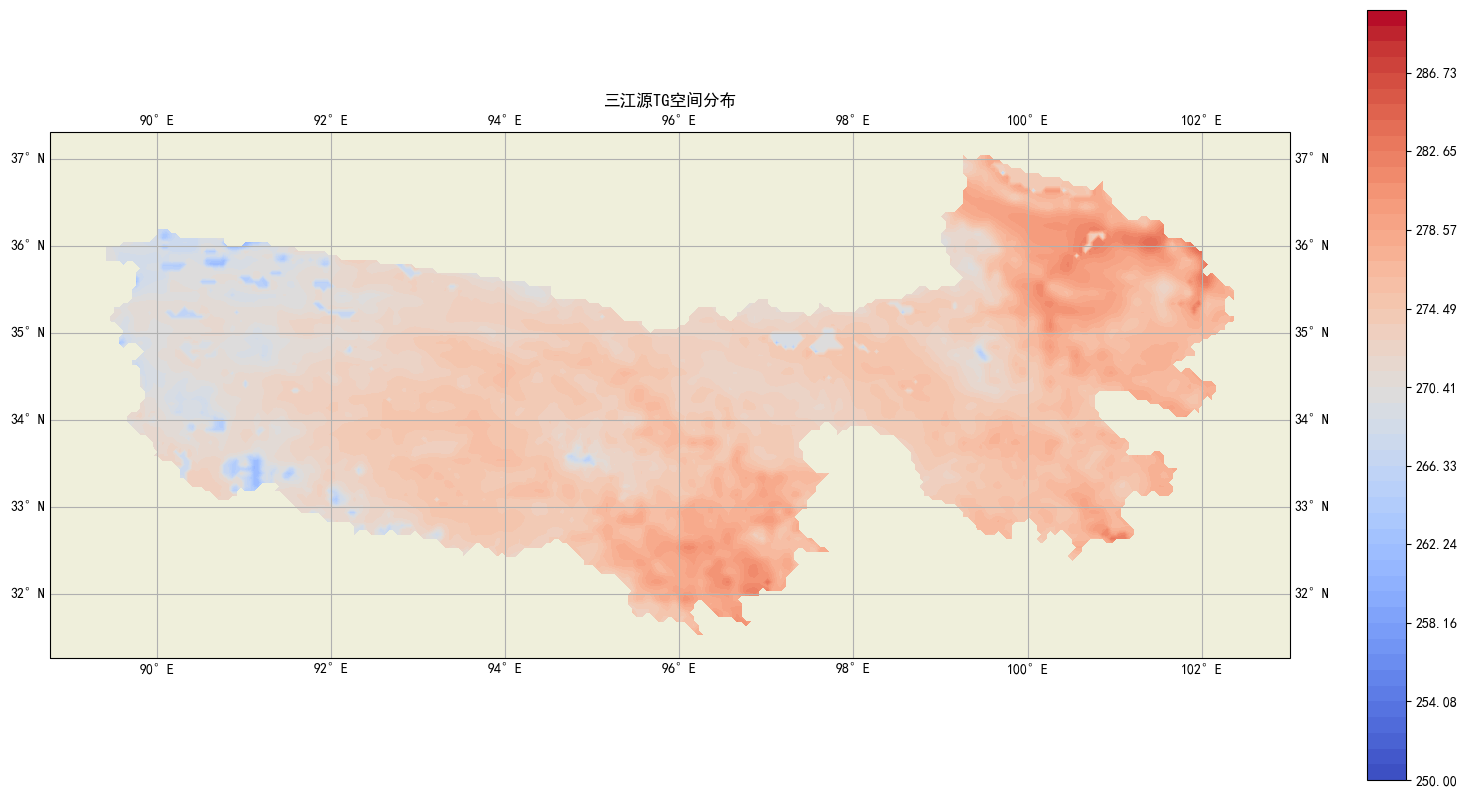

In [ ]:
nc_file1 = 'D:\CSSP\out_data/SJY/CSSPsurface_TG_SJY2001_2017_glc_ctl.nc'
varname = 'TG'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 
plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)


(139, 289)
257.35125732421875
284.78277587890625
Max value after masking: 290


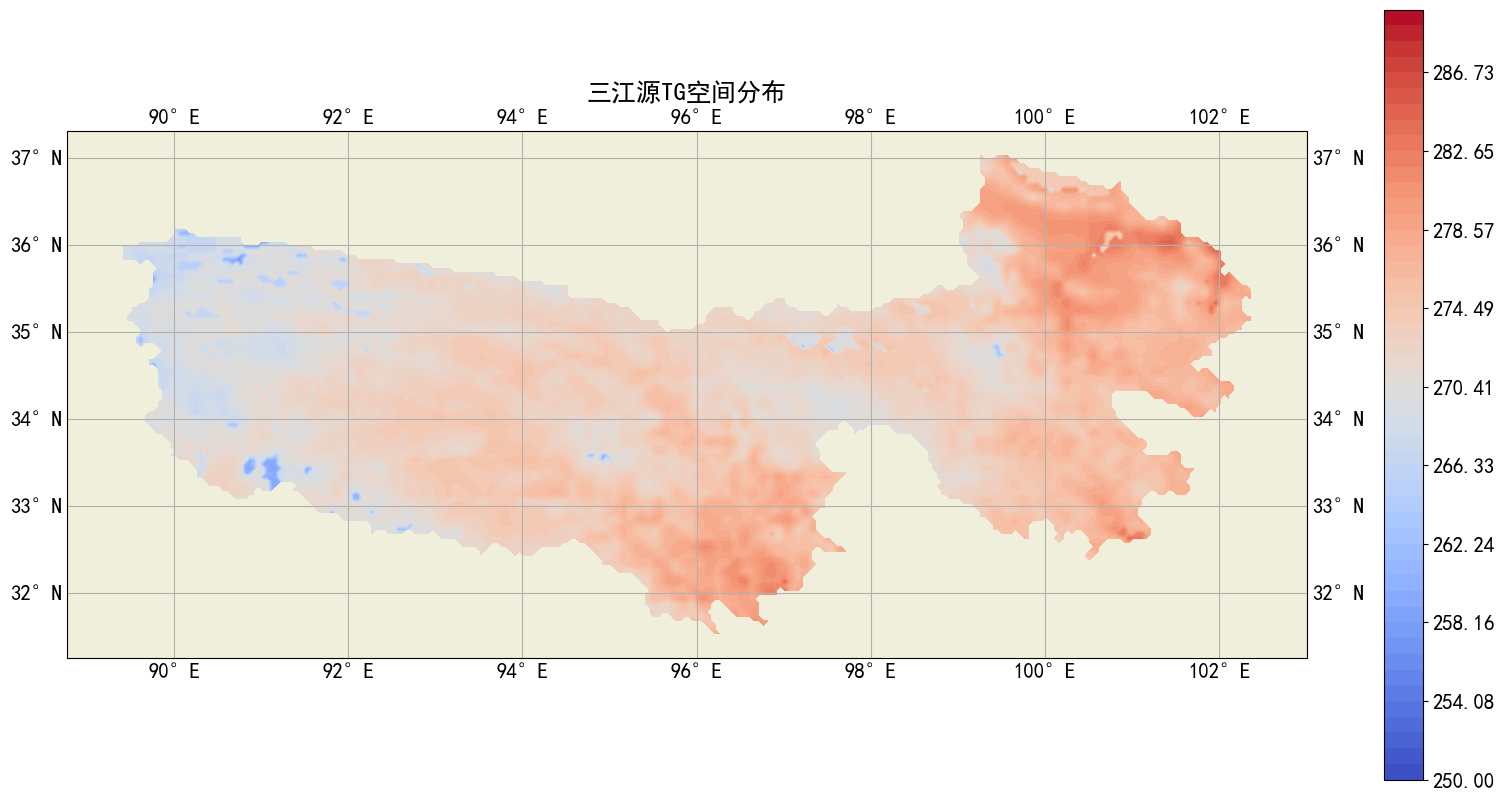

In [ ]:
nc_file1 = 'D:\CSSP\out_data/SJY/CSSPsurface_TG_SJY2001_2001_noglc.nc'
varname = 'TG'
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 
plot_spatial_distribution1(nc_file1,geo_file, varname,None,1)

(139, 289)
Max value after masking: 0.1


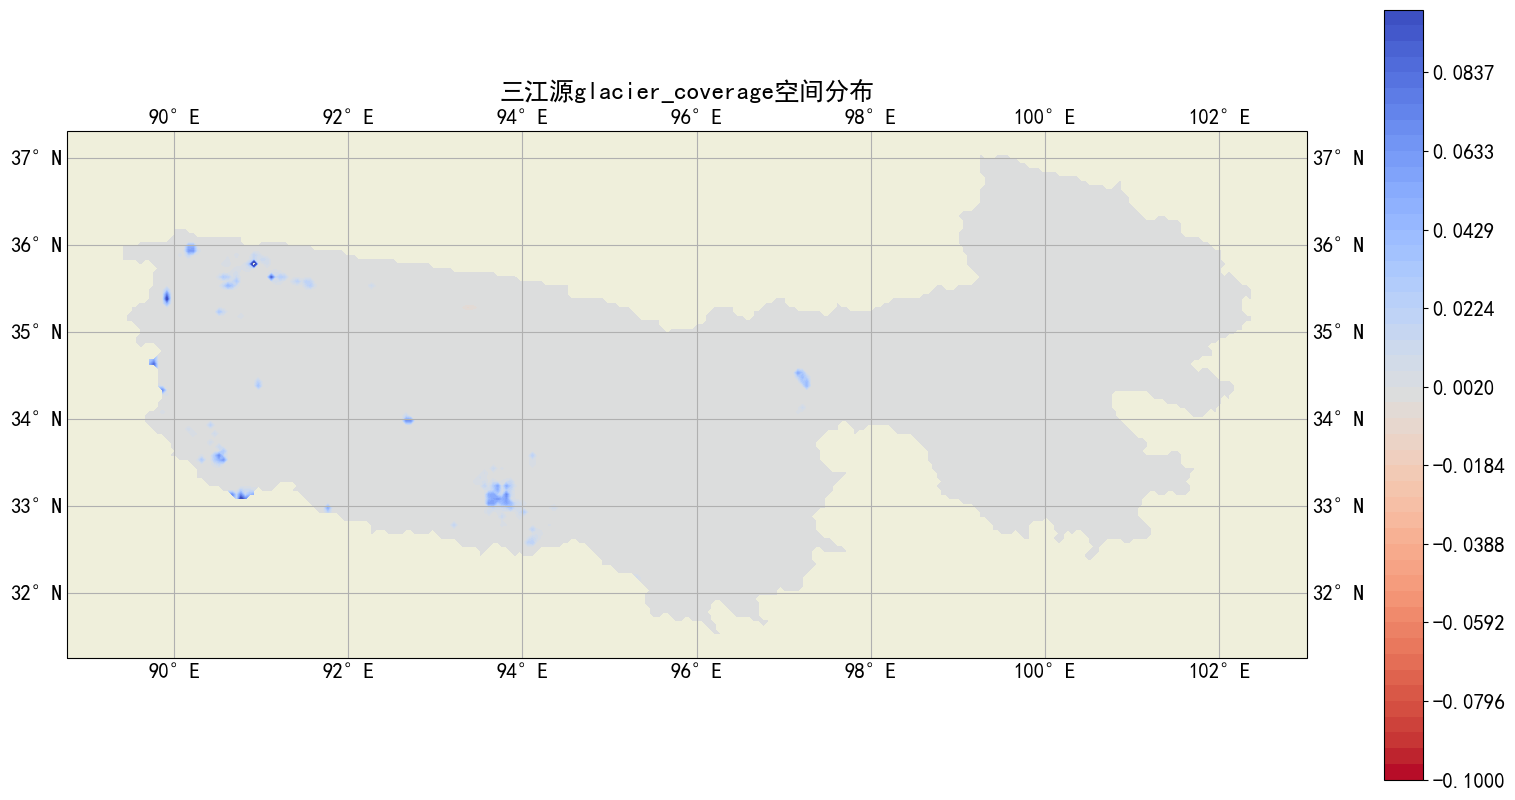

In [ ]:
nc_file1 = 'D:\CSSP\out_data\SJY/1976glacier_coverage_output.nc'
nc_file2 = 'D:\CSSP\out_data\SJY/2013glacier_coverage_output.nc'
varname = 'glacier_coverage'
dx = xr.open_dataset(mask_file)
mask = dx['mask']
mask = np.array(mask).astype(bool) 
# 读取NetCDF文件
ds = xr.open_dataset(nc_file1)
ds2 = xr.open_dataset(nc_file2)
geo = xr.open_dataset(geo_file)

# 提取变量数据
data = ds[varname]
data2 = ds2[varname]
print(data.shape)
lats = geo['XLAT']
lons = geo['XLON']
lat = np.array(lats[:, 0])
lon = np.array(lons[0, :])
lat = np.arange(30.635, 37.585, -(30.635 - 37.585) / 654)
lon = np.arange(88.665, 103.115, -(88.665 - 103.115) / 1372)   
data = data-data2
data = data[::-1,:]
# 检查是否提供了mask
if mask is not None:
    # 如果传入的mask为True的地方，将数据替换为mask_value（默认np.nan）
    data = data.where(mask, np.nan)

# 设置绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('coolwarm_r')  # 或者 'viridis'、'plasma' 等
vmin = -0.1
#data.min().values
vmax = 0.1
#data.max().values  # 获取最大值

print(f"Max value after masking: {vmax}")

# 设置等值线的范围
levels = np.linspace(vmin, vmax, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# 添加经纬网
ax.gridlines(draw_labels=True)
ax.set_title(f'三江源{varname}空间分布')

# 显示图像
plt.show()

In [ ]:

# 示例用法
geo_file = 'D:/CSSP/out_data/SJY/daily_TG_average_night.nc'
nc_file1 = 'D:/CSSP/out_data/SJY/daily_TG_average_day.nc'
mask_file = 'D:/CSSP/out_data/SJY/masksjy.nc'

varname = 'TG'

# 读取掩膜数据
dx = xr.open_dataset(mask_file)
mask = dx['masksjy']

# 调用函数进行绘图
#plot_spatial_distribution(nc_file1, geo_file, varname, None, mask_value=np.nan)



In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
from rasterio.enums import Resampling
from matplotlib import colors
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors


def plot_spatial_distribution(nc_file, geo_file, varname, tiff_mask_file=None, mask_value=np.nan):
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # 读取 NetCDF 文件
    ds = xr.open_dataset(nc_file)
    geo = xr.open_dataset(geo_file, engine='netcdf4')
    
    data2 = geo[varname]
    data = ds[varname]
    data = (data +data2)/2
    data = data[::-1,:] 
    print("Data shape:", data.shape)

    # 使用正确的 np.linspace 来生成经纬度
    #lats = np.linspace(30.635, 37.585,897)
    #lons = np.linspace(88.665, 103.115, 1382)
    lats = np.linspace(32.9733, 33.2067,  29)
    lons = np.linspace(91.9374, 92.1706, 24)
    # 使用 rasterio 读取 .tif 掩码文件
    with rasterio.open(tiff_mask_file) as src:
        mask = src.read(1)  # 读取第一波段
        mask = mask.astype(bool)  # 转换为布尔掩码
    
    # 应用 TIFF 掩膜
    if tiff_mask_file is not None:
        with rasterio.open(tiff_mask_file) as src:
            # 读取 TIFF 文件中的掩膜数据并进行重采样
            tiff_mask = src.read(1, out_shape=(29, 24), resampling=Resampling.bilinear)
            
            # 将 TIFF 掩膜转换为 xarray DataArray，并与数据集的纬度和经度对齐
            mask_xr = np.array(tiff_mask)
            mask_xr = mask_xr[::-1,:] -9
            # 应用掩膜
            data = xr.where(mask_xr > 0, data, mask_value)

    # 设置绘图
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    cmap = plt.get_cmap('coolwarm')  # 或者 'viridis'、'plasma' 等
    vmin = data.min().values
    vmax = data.max().values  # 获取最大值
    vmin = data.min().values
    print(f"Max value after masking: {vmax}")
    print(f"Min value after masking: {vmin}")
    vmax = 275# 获取最大值
    vmin = 260
    # 设置等值线的范围
    levels = np.linspace(vmin, vmax, 50)

    # 绘制等值线图
    contour = ax.contourf(lons, lats, data, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
    
    # 添加颜色条
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

    # 添加地理特征
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # 添加经纬网
    ax.gridlines(draw_labels=True)
    ax.set_title(f'三江源{varname}空间分布')

    # 显示图像
    plt.show()




Data shape: (29, 24)
Max value after masking: 275.85247802734375
Min value after masking: 260.8374328613281


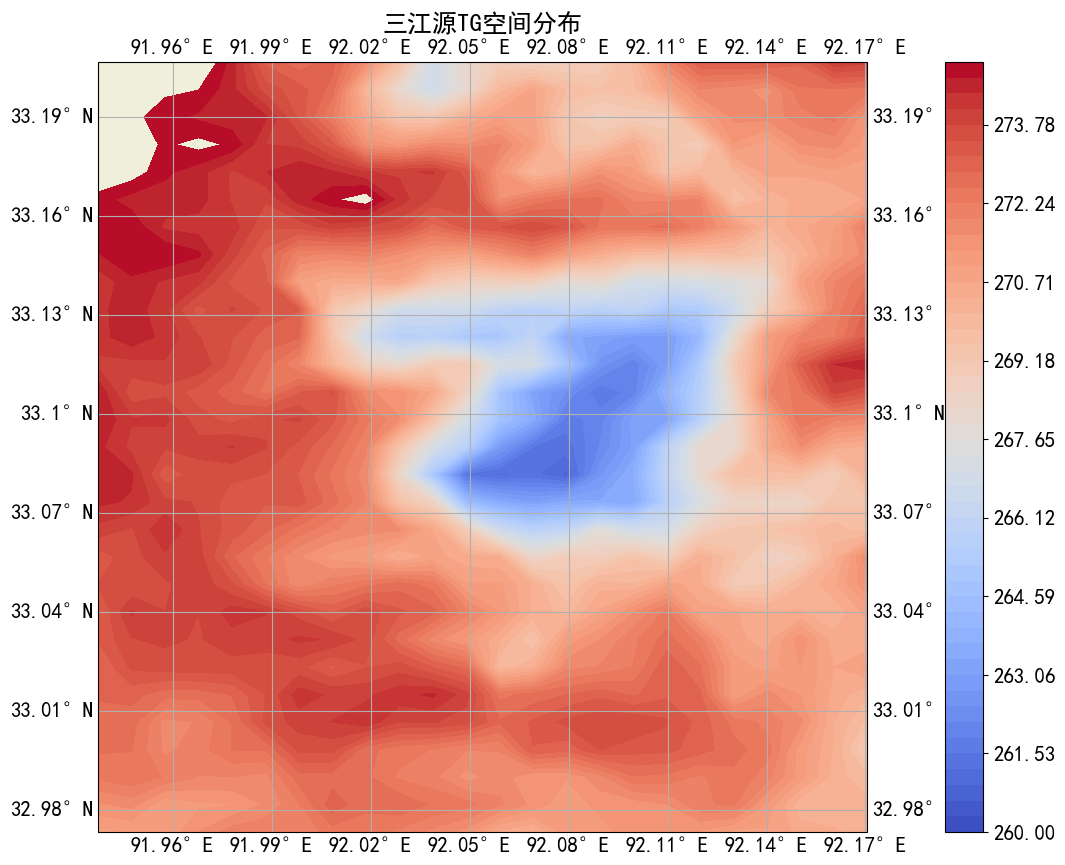

In [ ]:

geo_file = 'D:\CSSP\out_data/DKMD/daily_TG_average_day_2001_2016DKMD.nc'
nc_file1 = 'D:\CSSP\out_data/DKMD/daily_TG_average_night_2001_2016DKMD.nc'
varname = 'TG'
tiff_mask_file = 'D:/CSSP/DKMD/rastert_dem_for11.tif'  # 你的 TIFF 掩膜文件路
plot_spatial_distribution(nc_file1, geo_file, varname, tiff_mask_file, mask_value=np.nan)

Data shape: (897, 1382)
Resampled data shape: (139, 289)
Max value after masking: 290.5653381347656
Min value after masking: 130.97218322753906


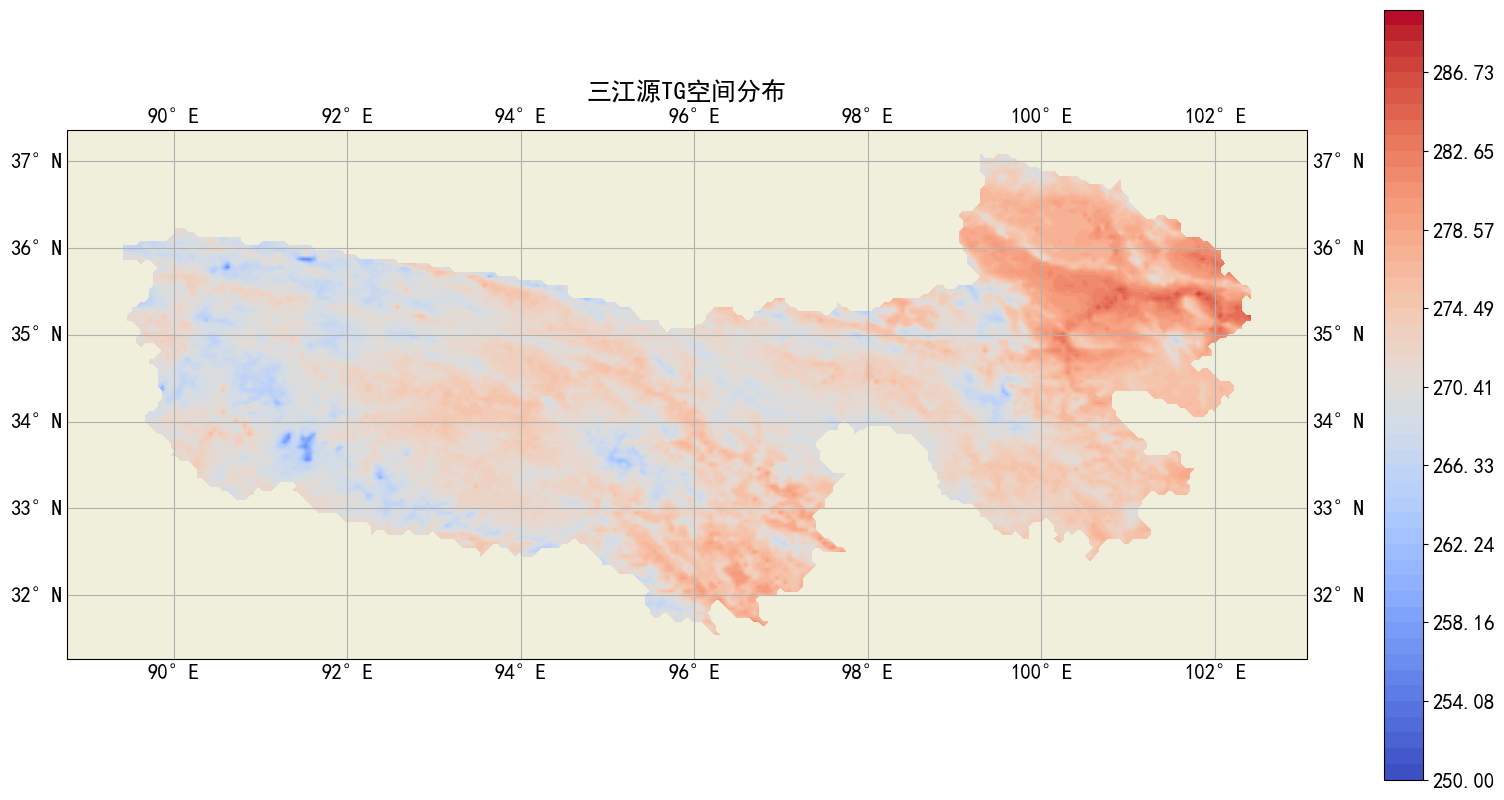

In [ ]:
import scipy.ndimage

geo_file = 'D:\CSSP\out_data/SJY/daily_TG_average_night_2001_2001.nc'
nc_file1 = 'D:\CSSP\out_data/SJY/daily_TG_average_day_2001_2001.nc'
varname = 'TG'
tiff_mask_file = 'D:/CSSP/SJY/mask_TGSJY8.tif'  # 你的 TIFF 掩膜文件路径
#dx = xr.open_dataset(mask_file)
#mask = dx['mask']
#ask = np.array(mask).astype(bool) 

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 NetCDF 文件
ds = xr.open_dataset(nc_file1)
geo = xr.open_dataset(geo_file, engine='netcdf4')

data2 = geo[varname]
data = ds[varname]
data = (data +data2)/2
data = data[::-1,:]
print("Data shape:", data.shape)
data_resampled = scipy.ndimage.zoom(data, (139 / data.shape[0], 289 / data.shape[1]), order=1)
print("Resampled data shape:", data_resampled.shape)
# 使用正确的 np.linspace 来生成经纬度
lats = np.linspace(30.635, 37.585,139)
lons = np.linspace(88.665, 103.115, 289)
# 使用 rasterio 读取 .tif 掩码文件

if mask is not None:
    # 如果 mask 为 True 的地方，将 data_resampled 替换为 np.nan
    data_resampled = np.where(mask, data_resampled, np.nan)

# 设置绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('coolwarm')  # 或者 'viridis'、'plasma' 等
#vmin = data.min().values
vmax = data.max().values  # 获取最大值
vmin = data.min().values
print(f"Max value after masking: {vmax}")
print(f"Min value after masking: {vmin}")
vmax = 290 # 获取最大值
vmin = 250
# 设置等值线的范围
levels = np.linspace(vmin, vmax, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats, data_resampled , levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# 添加经纬网
ax.gridlines(draw_labels=True)
ax.set_title(f'三江源{varname}空间分布')

# 显示图像
plt.show()

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
from rasterio.enums import Resampling
import scipy.ndimage

geo_file = 'D:/CSSP/out_data/SJY/daily_TG_average_night_2001_2001.nc'
nc_file1 = 'D:/CSSP/out_data/SJY/daily_TG_average_day_2001_2001.nc'
varname = 'TG'
tiff_mask_file = 'D:/CSSP/SJY/mask_TGSJY8.tif'

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 NetCDF 文件
ds = xr.open_dataset(nc_file1)
geo = xr.open_dataset(geo_file, engine='netcdf4')

data2 = geo[varname]
data = ds[varname]
data = (data + data2) / 2
data = data[::-1, :]  # 反转数据
print("Data shape:", data.shape)

# 使用正确的 np.linspace 来生成经纬度
lats = np.linspace(30.635, 37.585, 139)
lons = np.linspace(88.665, 103.115, 289)

# 使用 scipy 进行数据重采样到 (139, 289)
data_resampled = scipy.ndimage.zoom(data, (139 / data.shape[0], 289 / data.shape[1]), order=1)
print("Resampled data shape:", data_resampled.shape)

# 使用 rasterio 读取 .tif 掩码文件
with rasterio.open(tiff_mask_file) as src:
    mask = src.read(1, out_shape=(139, 289), resampling=Resampling.bilinear)
    mask = mask.astype(bool)

# 应用掩膜
data_resampled = np.where(mask, data_resampled, np.nan)

# 设置绘图
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = plt.get_cmap('coolwarm')  # 选择色彩映射表
vmin = 250
vmax = 290
levels = np.linspace(vmin, vmax, 50)

# 绘制等值线图
contour = ax.contourf(lons, lats, data_resampled, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

# 添加地理特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# 添加经纬网
ax.gridlines(draw_labels=True)
ax.set_title(f'三江源{varname}空间分布')

# 显示图像
plt.show()
